# Easy Money - Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, \
    roc_curve
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

import xgboost as xgb

In [25]:
__DATA_PATH__ = "../data/processed"

TARGET = "debit_card"

DEV_PARTITION_PERIOD = ("2018-01-28", "2019-02-28")
VAL_PARTITION_PERIOD = ("2019-03-28", "2019-05-28")

EXCLUDE_COLUMNS = ["pk_cid", "pk_partition"]

## Import data

In [4]:
dtypes = {'pk_cid': 'int64', 'active_customer': 'int8',
          'region_code': 'int8', 'gender': 'int8', 'age': 'int8', 'deceased': 'int8',
          'short_term_deposit': 'int8', 'loans': 'int8', 'mortgage': 'int8',
          'funds': 'int8', 'securities': 'int8', 'long_term_deposit': 'int8',
          'em_account_pp': 'int8', 'credit_card': 'int8', 'payroll': 'int8',
          'pension_plan': 'int8', 'payroll_account': 'int8', 'emc_account': 'int8',
          'debit_card': 'int8', 'em_account_p': 'int8', 'em_acount': 'int8',
          'entry_date_month': 'int8', 'entry_date_year': 'int8', 'entry_date_day': 'int8',
          'entry_date_week': 'int8', 'entry_date_weekday': 'int8', 'entry_date_trim': 'int8',
          'salary': 'float64', 'entry_channel_004': 'int8', 'entry_channel_007': 'int8',
          'entry_channel_013': 'int8', 'entry_channel_KAA': 'int8', 'entry_channel_KAB': 'int8',
          'entry_channel_KAD': 'int8', 'entry_channel_KAE': 'int8', 'entry_channel_KAF': 'int8',
          'entry_channel_KAG': 'int8', 'entry_channel_KAH': 'int8', 'entry_channel_KAI': 'int8',
          'entry_channel_KAJ': 'int8', 'entry_channel_KAK': 'int8', 'entry_channel_KAM': 'int8',
          'entry_channel_KAQ': 'int8', 'entry_channel_KAR': 'int8', 'entry_channel_KAS': 'int8',
          'entry_channel_KAT': 'int8', 'entry_channel_KAW': 'int8', 'entry_channel_KAY': 'int8',
          'entry_channel_KAZ': 'int8', 'entry_channel_KBE': 'int8', 'entry_channel_KBG': 'int8',
          'entry_channel_KBH': 'int8', 'entry_channel_KBO': 'int8', 'entry_channel_KBU': 'int8',
          'entry_channel_KBW': 'int8', 'entry_channel_KBY': 'int8', 'entry_channel_KBZ': 'int8',
          'entry_channel_KCB': 'int8', 'entry_channel_KCC': 'int8', 'entry_channel_KCH': 'int8',
          'entry_channel_KCI': 'int8', 'entry_channel_KCK': 'int8', 'entry_channel_KCL': 'int8',
          'entry_channel_KDA': 'int8', 'entry_channel_KDH': 'int8', 'entry_channel_KDR': 'int8',
          'entry_channel_KDS': 'int8', 'entry_channel_KDT': 'int8', 'entry_channel_KEH': 'int8',
          'entry_channel_KEJ': 'int8', 'entry_channel_KES': 'int8', 'entry_channel_KEY': 'int8',
          'entry_channel_KFA': 'int8', 'entry_channel_KFC': 'int8', 'entry_channel_KFD': 'int8',
          'entry_channel_KFF': 'int8', 'entry_channel_KFK': 'int8', 'entry_channel_KFL': 'int8',
          'entry_channel_KFP': 'int8', 'entry_channel_KFS': 'int8', 'entry_channel_KGC': 'int8',
          'entry_channel_KGN': 'int8', 'entry_channel_KGX': 'int8', 'entry_channel_KHC': 'int8',
          'entry_channel_KHD': 'int8', 'entry_channel_KHE': 'int8', 'entry_channel_KHF': 'int8',
          'entry_channel_KHK': 'int8', 'entry_channel_KHL': 'int8', 'entry_channel_KHM': 'int8',
          'entry_channel_KHN': 'int8', 'entry_channel_KHO': 'int8', 'entry_channel_KHP': 'int8',
          'entry_channel_KHQ': 'int8', 'entry_channel_KHS': 'int8', 'entry_channel_RED': 'int8',
          'entry_channel_UNKNOWN': 'int8', 'segment_00 - OTROS': 'int8',
          'segment_01 - TOP': 'int8', 'segment_02 - PARTICULARES': 'int8',
          'segment_03 - UNIVERSITARIO': 'int8', 'country_id_AR': 'int8', 'country_id_AT': 'int8',
          'country_id_BE': 'int8', 'country_id_BR': 'int8', 'country_id_CA': 'int8',
          'country_id_CH': 'int8', 'country_id_CI': 'int8', 'country_id_CL': 'int8',
          'country_id_CM': 'int8', 'country_id_CN': 'int8', 'country_id_CO': 'int8',
          'country_id_DE': 'int8', 'country_id_DJ': 'int8', 'country_id_DO': 'int8',
          'country_id_DZ': 'int8', 'country_id_ES': 'int8', 'country_id_ET': 'int8',
          'country_id_FR': 'int8', 'country_id_GA': 'int8', 'country_id_GB': 'int8',
          'country_id_GT': 'int8', 'country_id_HU': 'int8', 'country_id_IE': 'int8',
          'country_id_IT': 'int8', 'country_id_JM': 'int8', 'country_id_LU': 'int8',
          'country_id_MA': 'int8', 'country_id_MR': 'int8', 'country_id_MX': 'int8',
          'country_id_NO': 'int8', 'country_id_PE': 'int8', 'country_id_PL': 'int8',
          'country_id_PT': 'int8', 'country_id_QA': 'int8', 'country_id_RO': 'int8',
          'country_id_RU': 'int8', 'country_id_SA': 'int8', 'country_id_SE': 'int8',
          'country_id_SN': 'int8', 'country_id_US': 'int8', 'country_id_VE': 'int8'}

parse_dates = ['pk_partition']

In [6]:
%%time
df = pd.read_csv(f"{__DATA_PATH__}/easy_money_classification.csv", dtype=dtypes, parse_dates=parse_dates)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("entry_date", axis=1, inplace=True)
df["pk_partition"] = pd.to_datetime(df["pk_partition"])
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962838 entries, 0 to 5962837
Columns: 143 entries, pk_cid to country_id_VE
dtypes: datetime64[ns](1), float64(1), int64(1), int8(140)
memory usage: 932.6 MB
Wall time: 50.9 s


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,5962838.0,1.234933e+06,162293.085772,15891.0,1112533.0,1231097.0,1352339.75,1553689.0
active_customer,5962838.0,4.033799e-01,0.490576,0.0,0.0,0.0,1.00,1.0
region_code,5962838.0,2.580417e+01,13.603136,-1.0,13.0,28.0,36.00,52.0
gender,5962838.0,5.177870e-01,0.499684,0.0,0.0,1.0,1.00,1.0
age,5962838.0,2.976015e+01,11.980074,2.0,22.0,25.0,34.00,105.0
...,...,...,...,...,...,...,...,...
country_id_SA,5962838.0,2.850991e-06,0.001688,0.0,0.0,0.0,0.00,1.0
country_id_SE,5962838.0,2.683286e-06,0.001638,0.0,0.0,0.0,0.00,1.0
country_id_SN,5962838.0,2.850991e-06,0.001688,0.0,0.0,0.0,0.00,1.0
country_id_US,5962838.0,3.270255e-05,0.005719,0.0,0.0,0.0,0.00,1.0


## Classes

In [27]:
class EasyMoneyFilter(BaseEstimator, TransformerMixin):

    def __init__(self, target: str, group_by="pk_cid", sort_value=None):
        if sort_value is None:
            sort_value = ["pk_cid", "pk_partition"]
        self.target = target
        self.group_by = group_by
        self.sort_values = sort_value

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return pd.concat([
            self.get_fist_sales(X),
            self.get_last_no_sales(X)
        ]).sort_values(self.sort_values, ignore_index=True)

    def get_fist_sales(self, X) -> pd.DataFrame:
        first_sale = X.groupby([self.group_by, self.target]).first().reset_index()
        return first_sale[first_sale[self.target] == 1]

    def get_last_no_sales(self, X) -> pd.DataFrame:
        last_no_sale = X.groupby([self.group_by, self.target]).last().reset_index()
        return last_no_sale[last_no_sale[self.target] == 0]


class EasyMoneySplitter:

    def __init__(self, dev_partition_period: tuple, val_partition_period: tuple, exclude_columns):
        self.dev_partition_period = dev_partition_period
        self.val_partition_period = val_partition_period
        self.exclude_columns = exclude_columns

    def get_train_partition(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        return self._get_partition(dataframe, self.dev_partition_period[0], self.dev_partition_period[1])

    def get_validation_partition(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        return self._get_partition(dataframe, self.val_partition_period[0], self.val_partition_period[1])

    def _get_partition(self, dataframe: pd.DataFrame, from_date, to_date) -> pd.DataFrame:
        partition = self._split(dataframe, from_date, to_date)
        return partition.drop(self.exclude_columns, axis=1)

    def _split(self, dataframe: pd.DataFrame, from_date, to_date) -> pd.DataFrame:
        return dataframe[dataframe["pk_partition"].between(from_date, to_date)].reset_index(drop=True)

## Functions

In [28]:
def hist_plot(dataframe: pd.DataFrame, target: str):
    dataframe[target].hist()
    plt.show()
    print(target)
    print(dataframe[target].value_counts())


def relation_with_target(dataframe: pd.DataFrame, field: str, target: str):
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.countplot(data=dataframe, x=field, hue=target)
    plt.show()
    return dataframe.pivot_table(index=field, values=target, aggfunc=[len, sum, np.mean])

## Filter data

In [29]:
pipe = Pipeline(steps=[
    ("filter", EasyMoneyFilter(TARGET)),
])

df_prep = pipe.fit_transform(df)
df_prep

,pk_cid,debit_card,pk_partition,active_customer,region_code,gender,age,deceased,short_term_deposit,loans,...,country_id_PL,country_id_PT,country_id_QA,country_id_RO,country_id_RU,country_id_SA,country_id_SE,country_id_SN,country_id_US,country_id_VE
0,15891,0,2018-08-28,0,28,1,59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16063,0,2019-05-28,0,28,1,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16203,0,2019-05-28,1,8,0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16502,0,2019-05-28,1,28,1,58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17457,1,2018-09-28,1,28,1,53,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505038,1553685,0,2019-05-28,0,13,0,52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505039,1553686,0,2019-05-28,0,41,1,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505040,1553687,0,2019-05-28,0,28,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505041,1553688,0,2019-05-28,0,39,1,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Target distribution

In [30]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,505043.0,1.275410e+06,178848.145497,15891.0,1144669.5,1285803.0,1421230.5,1553689.0
debit_card,505043.0,1.257992e-01,0.331623,0.0,0.0,0.0,0.0,1.0
active_customer,505043.0,4.282487e-01,0.494825,0.0,0.0,0.0,1.0,1.0
region_code,505043.0,2.591608e+01,13.504364,-1.0,13.0,28.0,36.0,52.0
gender,505043.0,5.051213e-01,0.499974,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
country_id_SA,505043.0,1.980029e-06,0.001407,0.0,0.0,0.0,0.0,1.0
country_id_SE,505043.0,3.960059e-06,0.001990,0.0,0.0,0.0,0.0,1.0
country_id_SN,505043.0,1.980029e-06,0.001407,0.0,0.0,0.0,0.0,1.0
country_id_US,505043.0,3.366050e-05,0.005802,0.0,0.0,0.0,0.0,1.0


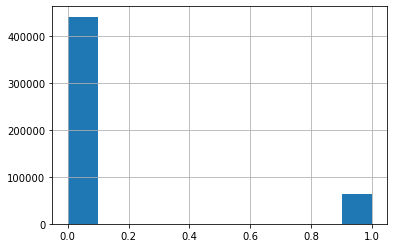

debit_card
0    441509
1     63534
Name: debit_card, dtype: int64


In [31]:
hist_plot(df_prep, TARGET)

<AxesSubplot:xlabel='debit_card', ylabel='age'>

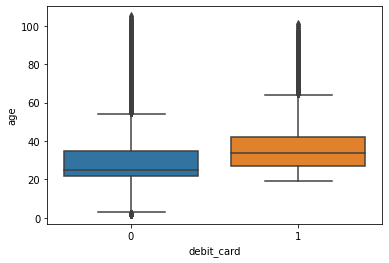

In [34]:
sns.boxplot(data=df_prep, x=TARGET, y="age")

<AxesSubplot:xlabel='debit_card', ylabel='active_customer'>

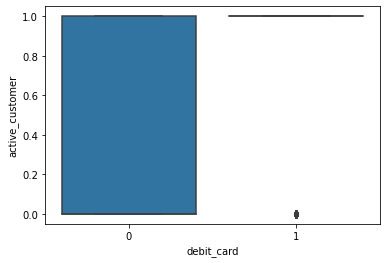

In [42]:
sns.boxplot(data=df_prep, x=TARGET, y="active_customer")

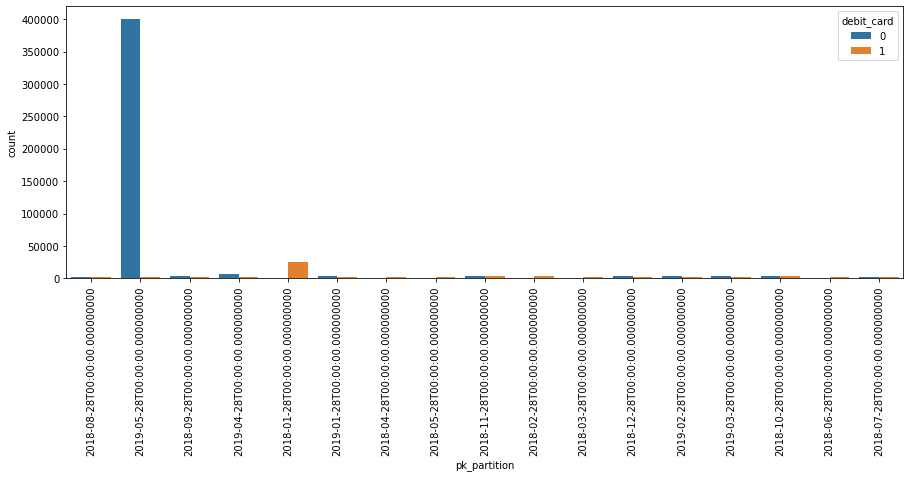

,len,sum,mean
,debit_card,debit_card,debit_card
pk_partition,,,
2018-01-28,25509,24696,0.968129
2018-02-28,4641,3708,0.798966
2018-03-28,3479,2691,0.773498
2018-04-28,2856,2121,0.742647
2018-05-28,2643,1803,0.682179
2018-06-28,2706,1834,0.677753
2018-07-28,3965,1942,0.489786
2018-08-28,4479,1943,0.433802


In [35]:
relation_with_target(df_prep, "pk_partition", TARGET)

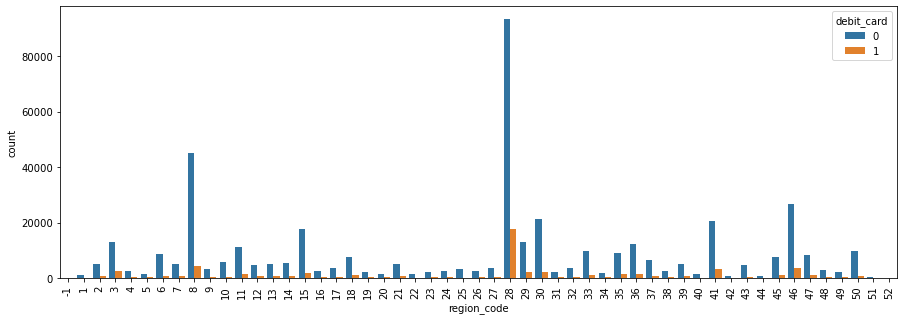

,len,sum,mean
,debit_card,debit_card,debit_card
region_code,,,
-1,190,35,0.184211
1,1174,149,0.126917
2,5758,623,0.108197
3,15439,2528,0.163741
4,3063,569,0.185766
5,1772,262,0.147856
6,9329,723,0.077500
7,5843,781,0.133664


In [43]:
relation_with_target(df_prep, "region_code", TARGET)

## Split dataframes

In [36]:
splitter = EasyMoneySplitter(DEV_PARTITION_PERIOD, VAL_PARTITION_PERIOD, EXCLUDE_COLUMNS)

### Train partition

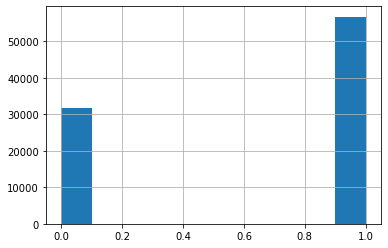

debit_card
1    56766
0    31628
Name: debit_card, dtype: int64


In [37]:
train_df = splitter.get_train_partition(df_prep)
hist_plot(train_df, TARGET)

### Validation partition

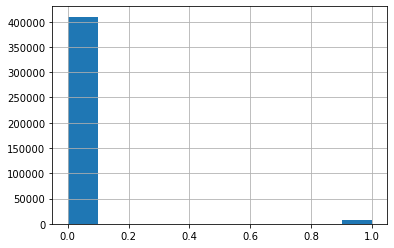

debit_card
0    409881
1      6768
Name: debit_card, dtype: int64


In [38]:
validation_df = splitter.get_validation_partition(df_prep)
hist_plot(validation_df, TARGET)

#### Partitions

In [39]:
dev_X = train_df.drop(TARGET, axis=1)
dev_y = train_df[[TARGET]]

X_val = validation_df.drop(TARGET, axis=1)
y_val = validation_df[[TARGET]]

X_train, X_test, y_train, y_test = train_test_split(dev_X, dev_y, test_size=0.2, random_state=13, stratify=dev_y)

In [40]:
print(f"""
TRAIN:
    X_train.shape: {X_train.shape}
    y_train.shape: {y_train.shape}
TEST:
    X_test.shape: {X_test.shape}
    y_test.shape: {y_test.shape}
VALIDATION:
    X_val.shape: {X_val.shape}
    y_val.shape: {y_val.shape}
""")


TRAIN:
    X_train.shape: (70715, 140)
    y_train.shape: (70715, 1)
TEST:
    X_test.shape: (17679, 140)
    y_test.shape: (17679, 1)
VALIDATION:
    X_val.shape: (416649, 140)
    y_val.shape: (416649, 1)



## Modelling experimentation

In [41]:
clf = xgb.XGBClassifier()
# clf = dt()

clf.fit(X_train, y_train)

y_pred_acc = clf.predict(X_test)

print("TEST")
print('AUC Score : ' + str(roc_auc_score(y_test, y_pred_acc)))
print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test, y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test, y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test, y_pred_acc)))

y_pred_acc_val = clf.predict(X_val)
print("VALIDATION")
print('AUC Score : ' + str(roc_auc_score(y_val, y_pred_acc_val)))
print('Accuracy Score : ' + str(accuracy_score(y_val, y_pred_acc_val)))
print('Precision Score : ' + str(precision_score(y_val, y_pred_acc_val)))
print('Recall Score : ' + str(recall_score(y_val, y_pred_acc_val)))
print('F1 Score : ' + str(f1_score(y_val, y_pred_acc_val)))

confusion_matrix(y_test, y_pred_acc)

C:\Users\alfre\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alfre\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[14:08:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TEST
AUC Score : 0.6917481104394017
Accuracy Score : 0.7675773516601617
Precision Score : 0.749483399917344
Recall Score : 0.958425085880384
F1 Score : 0.841173514746241
VALIDATION
AUC Score : 0.5390969259396357
Accuracy Score : 0.33290131501575665
Precision Score : 0.018094256468581177
Recall Score : 0.7522163120567376
F1 Score : 0.03533846068414038


array([[ 2689,  3637],
       [  472, 10881]], dtype=int64)

In [61]:
def generate_clf_from_search(grid_or_random, clf, parameters, scorer, X, y):
    if grid_or_random == "Grid":
        search_obj = GridSearchCV(clf, parameters, scoring=scorer)
    elif grid_or_random == "Random":
        search_obj = RandomizedSearchCV(clf, parameters, scoring=scorer)
    fit_obj = search_obj.fit(X, y)
    best_clf = fit_obj.best_estimator_
    return best_clf

In [62]:
from sklearn.metrics import make_scorer

parameters = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [50, 100, 150],
    # 'min_samples_split':[2,3,4,5],
    # 'criterion': ['gini', 'entropy']
}
scorer = make_scorer(roc_auc_score)

In [63]:
best_clf_random = generate_clf_from_search(
    "Random",
    clf,
    parameters,
    scorer,
    X_train,
    y_train
)

C:\Users\alfre\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alfre\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[01:59:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:59:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [57]:
best_clf_random.best_estimator_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_estimator_'

In [59]:
clf.best_params_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_params_'

In [58]:
clf.best_score_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_score_'

In [45]:
from sklearn import metrics

sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_clf_random, X_test, y_test, cv=5, scoring='roc_auc')
scores.mean()

0.8875681079685387

In [39]:
best_clf_random.fit(X_train, y_train)
# Make predictions using the new model.
best_train_predictions = best_clf_random.predict(X_train)
best_test_predictions = best_clf_random.predict(X_test)
best_validation_predictions = best_clf_random.predict(X_val)

# Calculate the f1_score of the new model.
print("TEST")
print('AUC Score : ' + str(roc_auc_score(y_test, best_test_predictions)))
print('Accuracy Score : ' + str(accuracy_score(y_test, best_test_predictions)))
print('Precision Score : ' + str(precision_score(y_test, best_test_predictions)))
print('Recall Score : ' + str(recall_score(y_test, best_test_predictions)))
print('F1 Score : ' + str(f1_score(y_test, best_test_predictions)))

print("VALIDATION")
print('AUC Score : ' + str(roc_auc_score(y_val, best_validation_predictions)))
print('Accuracy Score : ' + str(accuracy_score(y_val, best_validation_predictions)))
print('Precision Score : ' + str(precision_score(y_val, best_validation_predictions)))
print('Recall Score : ' + str(recall_score(y_val, best_validation_predictions)))
print('F1 Score : ' + str(f1_score(y_val, best_validation_predictions)))

TEST
AUC Score : 0.7662356481244059
Accuracy Score : 0.9358846988036101
Precision Score : 0.9533958553925276
Recall Score : 0.9767395010072835
F1 Score : 0.9649265156154317
VALIDATION
AUC Score : 0.604942960128016
Accuracy Score : 0.35988806198140066
Precision Score : 0.07923599260523322
Recall Score : 0.8844246031746031
F1 Score : 0.1454417906551814


In [49]:
model = best_clf_random

## Modelling

In [50]:
_MAX_DEPTH = 4
_MIN_SAMPLES_LEAF = 100
_RANDOM_STATE = 42

_MIN_CHILD_WEIGHT = 100
_N_ESTIMATORS = 50

In [51]:
# model = xgb.XGBClassifier(
#     max_depth=_MAX_DEPTH,
#     min_child_weight=_MIN_CHILD_WEIGHT,
#     n_estimators=_N_ESTIMATORS,
#     random_state=_RANDOM_STATE,
#     use_label_encoder=False
# )

In [52]:
# model.fit(X_train, y_train)

In [96]:
# accuracy = round(model.score(X_val, y_val), 4)
# print('Accuracy: %0.4f' % (accuracy))

Accuracy: 0.3837


In [53]:
y_score = pd.DataFrame(model.predict_proba(X_test)[:, 1], index=y_test.index, columns=['score'])
roc_auc_score(y_test, y_score)

0.8867158336732655

Text(0, 0.5, 'TPR')

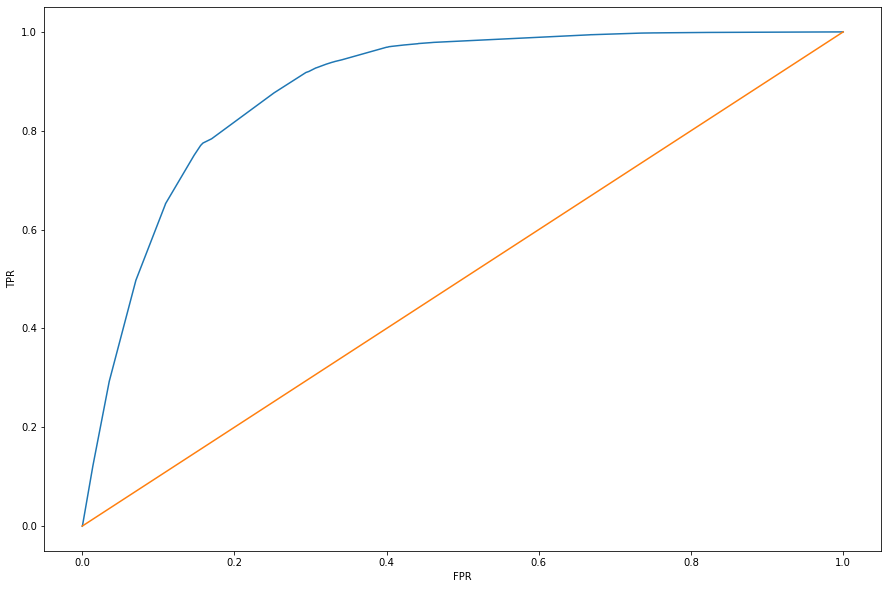

In [54]:
fpr, tpr, th = roc_curve(y_test, y_score)
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')

<AxesSubplot:>

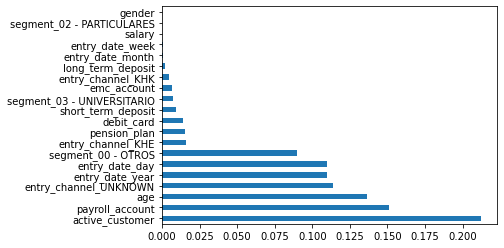

In [55]:
feat_importances = pd.Series(model.feature_importances_, index=dev_X.columns)
feat_importances.nlargest(20).plot(kind='barh')